In [76]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col="DATE")
weather


,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2000-01-01,NP000444540,"KATHMANDU AIRPORT, NP",NaN,51.0,70.0,35.0
2000-01-02,NP000444540,"KATHMANDU AIRPORT, NP",NaN,54.0,71.0,36.0
2000-01-03,NP000444540,"KATHMANDU AIRPORT, NP",NaN,53.0,71.0,35.0
2000-01-04,NP000444540,"KATHMANDU AIRPORT, NP",NaN,58.0,71.0,35.0
2000-01-05,NP000444540,"KATHMANDU AIRPORT, NP",NaN,56.0,71.0,35.0
...,...,...,...,...,...,...
2025-02-15,NP000444540,"KATHMANDU AIRPORT, NP",0.0,53.0,64.0,45.0
2025-02-16,NP000444540,"KATHMANDU AIRPORT, NP",0.0,55.0,69.0,45.0
2025-02-17,NP000444540,"KATHMANDU AIRPORT, NP",0.0,56.0,68.0,47.0


In [77]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.392688
TAVG       0.007487
TMAX       0.386199
TMIN       0.668705
dtype: float64

In [83]:
valid_columns = null_pct[null_pct < .05  ].index
valid_columns

Index(['STATION', 'NAME', 'TAVG'], dtype='object')

In [84]:
valid_columns = valid_columns.intersection(weather.columns)
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()
weather

,station,name,tavg
DATE,,,
2000-01-01,NP000444540,"KATHMANDU AIRPORT, NP",51.0
2000-01-02,NP000444540,"KATHMANDU AIRPORT, NP",54.0
2000-01-03,NP000444540,"KATHMANDU AIRPORT, NP",53.0
2000-01-04,NP000444540,"KATHMANDU AIRPORT, NP",58.0
2000-01-05,NP000444540,"KATHMANDU AIRPORT, NP",56.0
...,...,...,...
2025-02-15,NP000444540,"KATHMANDU AIRPORT, NP",53.0
2025-02-16,NP000444540,"KATHMANDU AIRPORT, NP",55.0
2025-02-17,NP000444540,"KATHMANDU AIRPORT, NP",56.0


In [85]:
weather = weather.ffill()
weather.apply(pd.isnull).sum()

station    0
name       0
tavg       0
dtype: int64

In [86]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
tavg       0
dtype: int64

In [87]:
weather.dtypes

station     object
name        object
tavg       float64
dtype: object

In [88]:
weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13', '2025-02-14',
       '2025-02-15', '2025-02-16', '2025-02-17', '2025-02-18', '2025-02-19'],
      dtype='object', name='DATE', length=8014)

In [89]:
weather.index = pd.to_datetime(weather.index)
weather.index.year.value_counts().sort_index()

DATE
2000    366
2001    360
2002    351
2003    363
2004    358
2005    352
2006    208
2007    195
2008    354
2009    348
2010    346
2011    363
2012    360
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022    365
2023    365
2024    356
2025     50
Name: count, dtype: int64

<Axes: xlabel='DATE'>

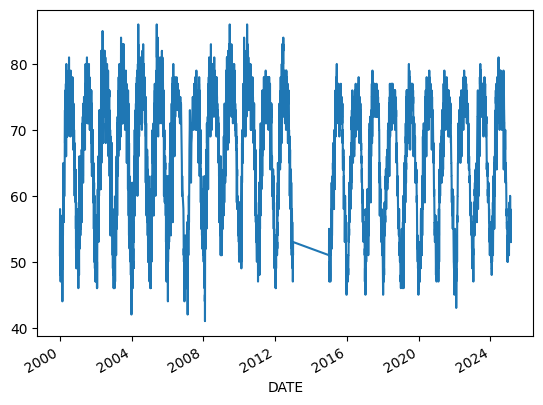

In [91]:
weather["tavg"].plot()

In [111]:
weather["target"] = weather["tavg"].shift(-1)
weather

,station,name,tavg,tmax,target
DATE,,,,,
2000-01-01,NP000444540,"KATHMANDU AIRPORT, NP",51.0,None,54.0
2000-01-02,NP000444540,"KATHMANDU AIRPORT, NP",54.0,None,53.0
2000-01-03,NP000444540,"KATHMANDU AIRPORT, NP",53.0,None,58.0
2000-01-04,NP000444540,"KATHMANDU AIRPORT, NP",58.0,None,56.0
2000-01-05,NP000444540,"KATHMANDU AIRPORT, NP",56.0,None,56.0
...,...,...,...,...,...
2025-02-15,NP000444540,"KATHMANDU AIRPORT, NP",53.0,None,55.0
2025-02-16,NP000444540,"KATHMANDU AIRPORT, NP",55.0,None,56.0
2025-02-17,NP000444540,"KATHMANDU AIRPORT, NP",56.0,None,56.0


In [112]:
weather=weather.ffill()
weather

,station,name,tavg,tmax,target
DATE,,,,,
2000-01-01,NP000444540,"KATHMANDU AIRPORT, NP",51.0,None,54.0
2000-01-02,NP000444540,"KATHMANDU AIRPORT, NP",54.0,None,53.0
2000-01-03,NP000444540,"KATHMANDU AIRPORT, NP",53.0,None,58.0
2000-01-04,NP000444540,"KATHMANDU AIRPORT, NP",58.0,None,56.0
2000-01-05,NP000444540,"KATHMANDU AIRPORT, NP",56.0,None,56.0
...,...,...,...,...,...
2025-02-15,NP000444540,"KATHMANDU AIRPORT, NP",53.0,None,55.0
2025-02-16,NP000444540,"KATHMANDU AIRPORT, NP",55.0,None,56.0
2025-02-17,NP000444540,"KATHMANDU AIRPORT, NP",56.0,None,56.0


In [ ]:
from sklearn.model_selection import Ridge
rr=Ridge(alpha=.1)

In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station","tmax"])]
predictors

Index(['tavg', 'tmax'], dtype='object')

In [130]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

def backtest(weather, model, predictors, start=1050, step=90):
    """
    Perform backtesting by training a model on past data and predicting future values.

    Parameters:
    - weather: DataFrame containing the dataset
    - model: Machine learning model (e.g., Ridge, RandomForest)
    - predictors: List of predictor column names
    - start: Initial training size
    - step: Step size for expanding training set

    Returns:
    - DataFrame containing actual vs. predicted values and their difference
    """
    all_predictions = []
    imputer = SimpleImputer(strategy="mean")  # Handle missing values

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :].copy()
        test = weather.iloc[i:(i+step), :].copy()

        # Fill missing values
        train[predictors] = imputer.fit_transform(train[predictors])
        test[predictors] = imputer.transform(test[predictors])

        # Fit model on training data
        model.fit(train[predictors], train["target"])

        # Predict on test data
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)

        # Store actual vs. predicted values
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)

    return pd.concat(all_predictions)

# Example Usage
rr = Ridge()  # Example model
predictions = backtest(weather, rr, predictors)
print(predictions)


c:\Users\ACER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['tmax']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Columns must be same length as key